# Homework: Notebooks to Illustrator

In this notebook you'll be building basic graphics which you'll then export to Illustrator and clean up.

# Homework tips

## How to do this homework

**Start in pandas, Altair or ggplot,** expor to PDF or SVG, then move on over to Illustrator. If you're using Python I *strongly* recommend Altair instead of pandas `.plot`. If you're using ggplot I recommend saving to PDF instead of SVG when using `ggsave`.

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some Buzzfeed line graphs, etc.

**You choose when to leave the notebook.** I personally do the majority of my work in Illustrator, so as soon as I have all the bars and text I need I'm using `ggsave` and am on my way. Other folks who are more interested in ggplot, though, might go deeper before exporting.

If the coding is too tough, don't worry! Just use DataWrapper and on the **Publish & Embed** step choose to export as PDF under **Export or duplicate visualization**.

**I've found [ChatGPT](https://chat.openai.com/chat) to be a lifesaver for chart tweaks before you head out to Illustrator.** If it gives you an oddly complicated answer for how to do something, you might want to ask "is there an easier way to do that?"

## Illustrator tips

### Opening things in Illustrator

Select everything (Command+A) then `Object > Clipping Mask > Release` (Command + Option + 7) again and again and again until it doesn't work any more. Also do the same thing with `Object > Ungroup` (Command + Option + G).

### Fill vs. stroke colors

Fill is the inside, stroke is the outline.

![](images/fill-stroke.png)

You select them separately. The white-with-a-red-line color means no color.

### Background colors

In Illustrator, draw a square as big as your entire artboard, then do `Select > Arrange > Send to Back` to make it go behind everything else.

### Editing lines

`Window > Stroke` to open up the stroke menu, then you can change the size with "Weight" or make it dashed with "Dashed line" (you might need to click the little... thing in the upper right-hand corner of the Stroke window and pick 'Show options' to be able to see that)

![](images/stroke-stuff.png)

### Selecting multiple things in Illustrator

Hold shift, click multiple things. Or click and drag a box around them.

### Selecting all of the _____

Things that look like what you have selected: `Select > Same > Appearance` or `Fill Color` or `Stroke Color` or whatever

Text: `Select > Object > All Text Objects`

### My grid/axis lines are on top of my chart!

Select the line, then `Object > Arrange > Send to Back`

### I sent something to the back and it disappeared!!!

Maybe you have a white rectangle as a background? Try clicking the background and hitting delete.

### Rotating text or other things

Click it (black arrow), then move your mouse around its edge until you see a thing that kind of implies you can rotate it. Click and drag.

### Drawing straight lines or rotating nicely

Hold shift while you draw the line or rotate or move a thing and it will go straight.

### Lining up things

When you have multiple things selected, the `Align` bar becomes active at the top. You can... align things with other things using it instead of manually pushing things around. You might want to play around with the different "Align to..." options.

![](images/align.png)

The "key object" one can be pretty good, as it uses the "key object" as an anchor and moves everything around it. You select the key object by clicking (without holding shift) after you've made your selection. Key object = blue box.

In [1]:

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [87]:
%%R

library(jpeg)
library(png)
library(grid)
library(hrbrthemes)
library(dplyr)

----

# NYT: Bar graphs

Recreate the "bar charts from [this piece](https://www.nytimes.com/2017/12/20/upshot/democrats-2018-congressional-elections-polling.html) and [this piece](https://www.nytimes.com/2017/12/27/business/the-robots-are-coming-and-sweden-is-fine.html) and [this piece](https://www.nytimes.com/2017/09/29/upshot/dont-forget-the-republicans-incumbency-advantage-in-2018.html). **Only the bar charts!**

![](images/sample-nyt.png)

**Data:** 
   
* `data/generic_poll_lead.csv`
* `data/social-spending.csv`
* `data/cook_pvi.csv`

In [5]:
df_nyt_lead = pd.read_csv('data/generic_poll_lead.csv')
df_nyt_lead


,year,lead,in_power
0,2018,13.4,no
1,2016,1.2,yes
2,2014,3.0,yes
3,2012,1.5,no
4,2010,0.4,no
5,2008,11.0,no
6,2006,10.2,no
7,2004,2.5,no
8,2002,0.2,yes
9,2000,4.8,yes


In [6]:
df_nyt_lead.dtypes

year          int64
lead        float64
in_power     object
dtype: object

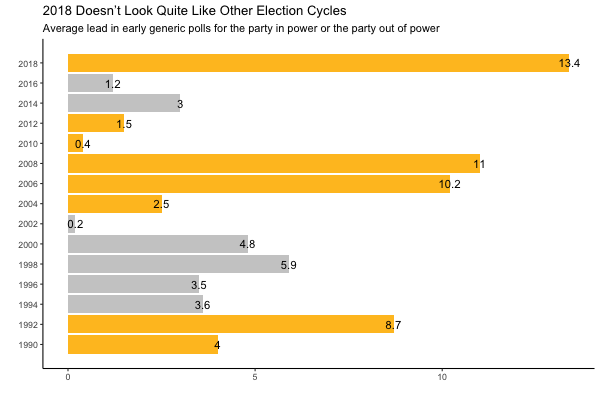

In [56]:
%%R -i df_nyt_lead -w 600 -h 400

nyt_lead <- ggplot(df_nyt_lead) +
aes(x=year, y=lead, fill=in_power) +
scale_x_continuous(breaks=unique(df_nyt_lead$year)) +
geom_bar(stat='identity') +
# annotate the bars with the lead
geom_text(aes(label=lead), size=4) +
scale_fill_manual(values=c("goldenrod1", "gray80"), guide=FALSE) +
coord_flip() +
theme_classic() +
labs(title="2018 Doesn’t Look Quite Like Other Election Cycles", 
    subtitle="Average lead in early generic polls for the party in power or the party out of power",
    x="", y="") 

nyt_lead    



In [57]:
%%R

ggsave("nyt_lead.pdf", width=6, height=4)


In [58]:
nyt_spending = pd.read_csv('data/social-spending.csv')
nyt_spending

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%
5,Austria,27.8%
6,Sweden,27.1%
7,Greece,25.0%
8,Germany,25.3%
9,Norway,25.1%


In [59]:

nyt_spending = nyt_spending.rename(columns={'Country': 'country', 'Social Spending': 'social_spending'})
nyt_spending

,country,social_spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%
5,Austria,27.8%
6,Sweden,27.1%
7,Greece,25.0%
8,Germany,25.3%
9,Norway,25.1%


In [69]:
# create a new column that combines the country and social_spending columns

nyt_spending['label'] = nyt_spending['country'] + ' ' + nyt_spending['social_spending'].astype(str)
nyt_spending

,country,social_spending,label
0,France,31.5%,France 31.5%
1,Finland,30.8%,Finland 30.8%
2,Belgium,29.0%,Belgium 29.0%
3,Italy,28.9%,Italy 28.9%
4,Denmark,28.7%,Denmark 28.7%
5,Austria,27.8%,Austria 27.8%
6,Sweden,27.1%,Sweden 27.1%
7,Greece,25.0%,Greece 25.0%
8,Germany,25.3%,Germany 25.3%
9,Norway,25.1%,Norway 25.1%


In [97]:
# remove % from social_spending column

nyt_spending['social_spending'] = nyt_spending['social_spending'].str.replace('%', '')

# convert social_spending column to numeric

nyt_spending['social_spending'] = pd.to_numeric(nyt_spending['social_spending'])
nyt_spending

,country,social_spending,label
0,France,31.5,France 31.5%
1,Finland,30.8,Finland 30.8%
2,Belgium,29.0,Belgium 29.0%
3,Italy,28.9,Italy 28.9%
4,Denmark,28.7,Denmark 28.7%
5,Austria,27.8,Austria 27.8%
6,Sweden,27.1,Sweden 27.1%
7,Greece,25.0,Greece 25.0%
8,Germany,25.3,Germany 25.3%
9,Norway,25.1,Norway 25.1%


In [108]:
# arrange the dataframe by social_spending in descending order

nyt_spending = nyt_spending.sort_values(by='social_spending', ascending=False)
nyt_spending


,country,social_spending,label
0,France,31.5,France 31.5%
1,Finland,30.8,Finland 30.8%
2,Belgium,29.0,Belgium 29.0%
3,Italy,28.9,Italy 28.9%
4,Denmark,28.7,Denmark 28.7%
5,Austria,27.8,Austria 27.8%
6,Sweden,27.1,Sweden 27.1%
8,Germany,25.3,Germany 25.3%
9,Norway,25.1,Norway 25.1%
7,Greece,25.0,Greece 25.0%


In [123]:
# save the dataframe as a csv file

nyt_spending.to_csv('nyt_datawrapper.csv', index=False)

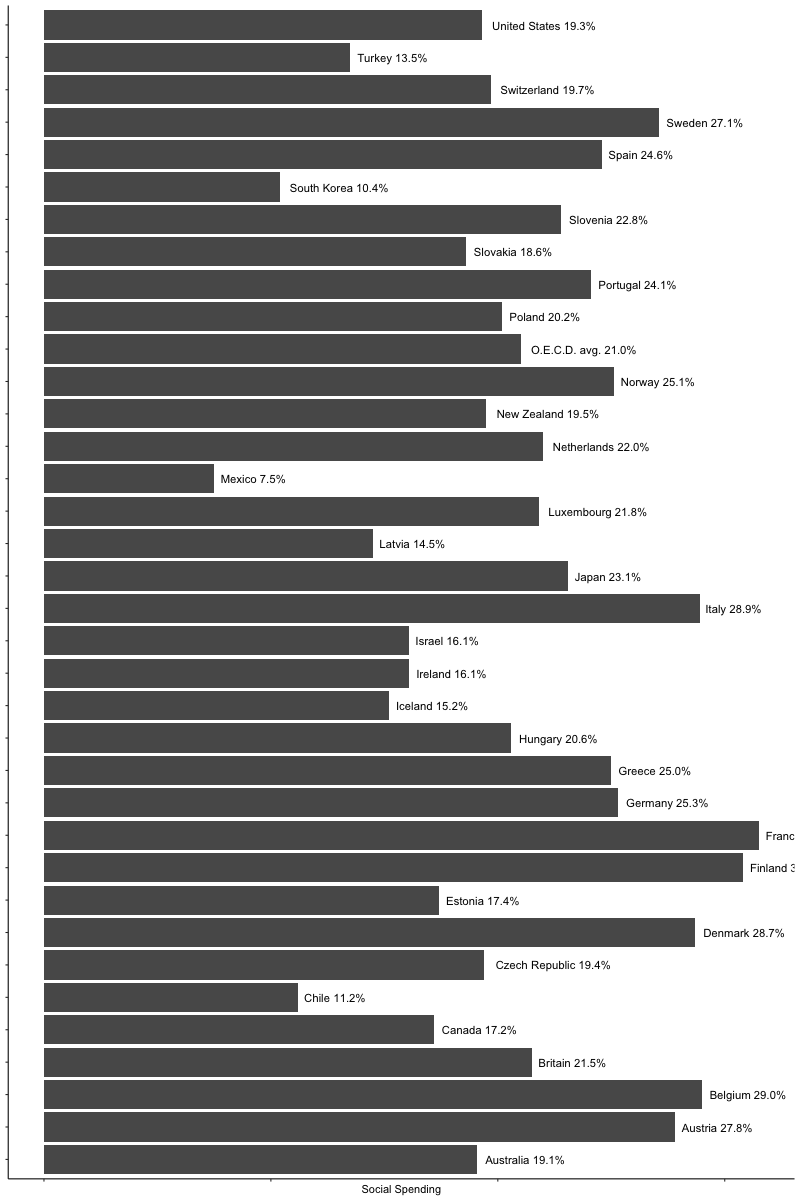

In [121]:
%%R -i nyt_spending -w 800 -h 1200



df_spending <- ggplot(nyt_spending) +
  aes(x = country, y = social_spending) + 
  geom_bar(stat = 'identity') +
  geom_text(aes(label = label), size = 4, hjust = -0.1) +
  coord_flip() +
  theme_classic() +
  theme(axis.text.x = element_blank(), axis.text.y = element_blank()) +
  labs(x = NULL, y = "Social Spending") +
  guides(fill = FALSE)

df_spending


In [117]:
# ggplot sucks. it could not arrange the bars in descending order.

In [122]:
%%R

ggsave("df_spending.pdf", plot = df_spending, width = 8, height = 12, units = "in")

In [124]:
nyt_incumbents = pd.read_csv('data/cook_pvi.csv')
nyt_incumbents

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25
5,I+3 to I+5,18
6,I+5 to I+10,7
7,I+10 or greater,0


In [125]:
nyt_incumbents['pct_survived'] = 100 - nyt_incumbents['pct_defeated']
nyt_incumbents

,cook_pvi,pct_defeated,pct_survived
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75
5,I+3 to I+5,18,82
6,I+5 to I+10,7,93
7,I+10 or greater,0,100


In [ ]:
# save the dataframe as a csv file

nyt_incumbents.to_csv('nyt_incumbents.csv', index=False)

---

# WaPo: Comparing waves

You are going to recreate the simple-yet-effective "Reported cases per day are more than double that of Jan. 2021 peak" visualization from [this piece](https://www.washingtonpost.com/health/interactive/2022/omicron-comparison-cases-deaths-hospitalizations/).

![](images/sample-wapo.png)

**I've included the unfiltered (and updated) data:** `data/owid-covid-data.csv`.

You're only interested in the USA.

---

# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the "Nigel Richard's Performance at Nationals" visualization from [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

*When you break them down by divisions, you **do not** need to draw the circles.*

![](images/sample-scrabble.png)

**I've included the data, but there's a little joining work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)